# Importar bibliotecas

In [ ]:
!pip install Orange3
!pip install ucimlrepo

In [ ]:
import Orange
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix

# Ler arquivos

---
Para dados importados diretamente pela api, usar o código comentado no lugar do código utilizado




In [ ]:
# adult = fetch_ucirepo(id=2)
base_census = pd.read_csv('census.csv')

# Pré-processamento

## Visualização dos Dados

---
Seção de visualização dos dados não foi preparada para usar os dados importados pela api, somente do arquivo csv




In [ ]:
# adult
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [ ]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

### Distribuição de renda por idade

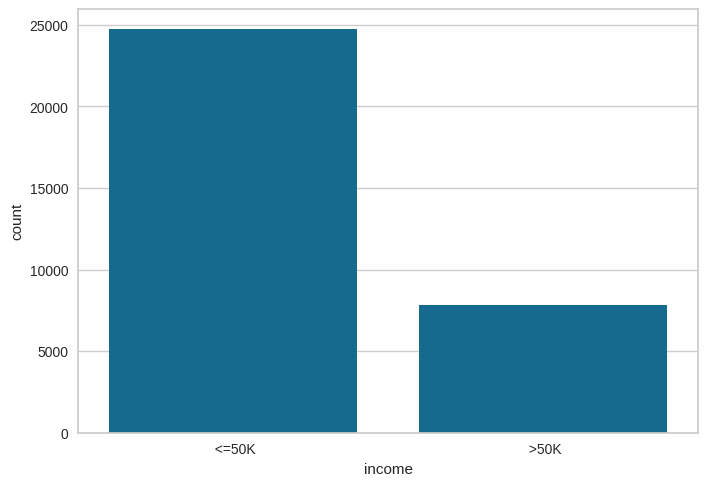

In [ ]:
sns.countplot(x = base_census['income']);

### Histograma

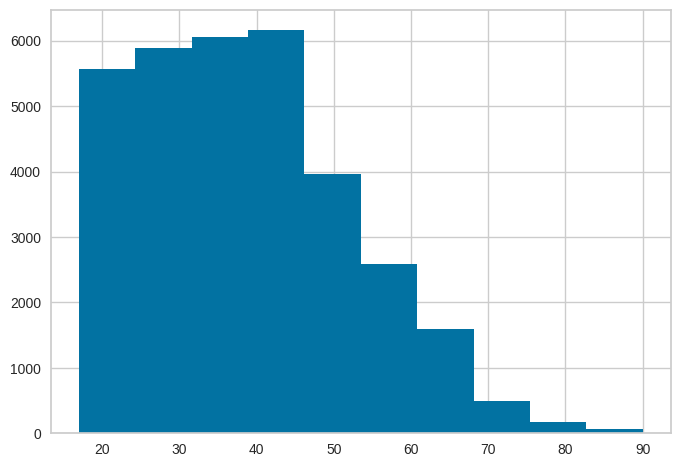

In [ ]:
plt.hist(x = base_census['age']);

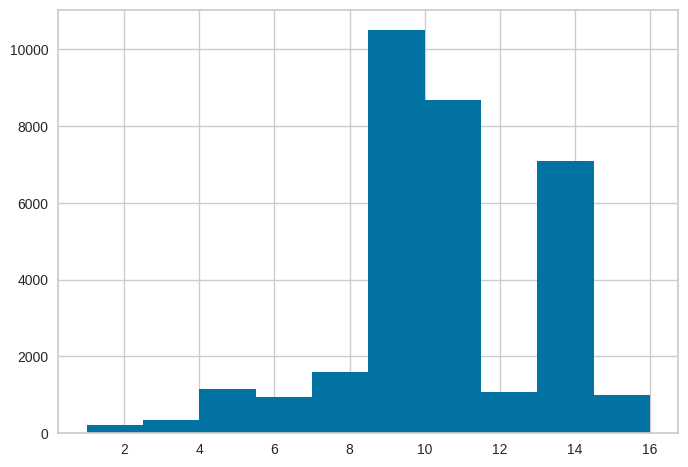

In [ ]:
plt.hist(x = base_census['education-num']);

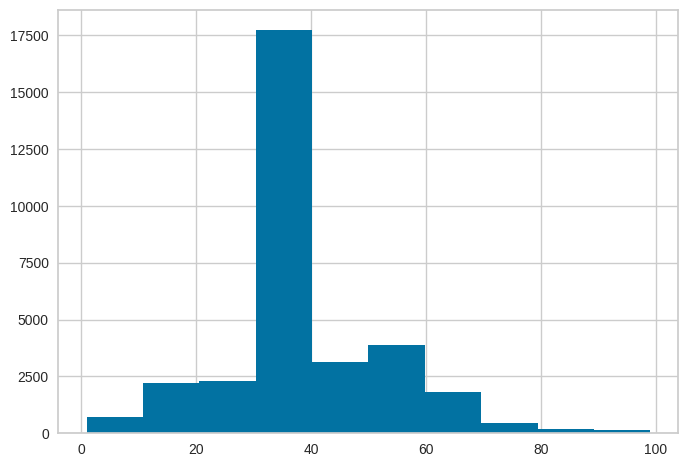

In [ ]:
plt.hist(x = base_census['hour-per-week']);

### Treemap

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

### Categorias paralelas

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe



In [ ]:
# x_census = adult.data.features.values
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, 'State-gov', 77516, ..., 0, 40, 'United-States'],
       [50, 'Self-emp-not-inc', 83311, ..., 0, 13, 'United-States'],
       [38, 'Private', 215646, ..., 0, 40, 'United-States'],
       ...,
       [38, 'Private', 374983, ..., 0, 50, 'United-States'],
       [44, 'Private', 83891, ..., 0, 40, 'United-States'],
       [35, 'Self-emp-inc', 182148, ..., 0, 60, 'United-States']],
      dtype=object)

In [ ]:
# y_census = adult.data.targets.values
y_census = base_census.iloc[:, 14].values
y_census

array([['<=50K'],
       ['<=50K'],
       ['<=50K'],
       ...,
       ['<=50K.'],
       ['<=50K.'],
       ['>50K.']], dtype=object)

## Tratamento de atributos categóricos

### LabelEnconder

In [ ]:
l_encoder = LabelEncoder()
teste = l_encoder.fit_transform(x_census[:, 1])

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [38, 4, 374983, ..., 0, 50, 39],
       [44, 4, 83891, ..., 0, 40, 39],
       [35, 5, 182148, ..., 0, 60, 39]], dtype=object)

### OneHotEnconder

In [ ]:
onehotencoder_census = ColumnTransformer(
    transformers=[(
        'OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])],
     remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
x_census.shape

(48842, 111)

## Escalonamento de Valores

In [ ]:
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

array([-1.97633103e-01, -1.73794701e-01, -2.61939756e-01, -1.43102672e-02,
       -1.50668036e+00, -1.89608507e-01, -2.93019423e-01,  4.86366370e+00,
       -2.07398835e-02, -1.41821021e-01, -1.71087896e-01, -1.96287032e-01,
       -1.16768783e-01, -7.12939510e-02, -1.02621183e-01, -1.41218915e-01,
       -1.25386729e-01, -1.84092512e-01, -2.09896040e-01,  2.25526729e+00,
       -1.10956708e-01, -6.90987591e-01, -2.39853082e-01, -4.12583306e-02,
       -1.31803280e-01, -5.35289279e-01, -3.96417179e-01, -2.75339617e-02,
       -9.19603890e-01, -1.14128272e-01,  1.42494376e+00, -1.79829138e-01,
       -1.79099826e-01, -1.98024242e-01,  2.77573184e+00, -1.75273238e-02,
       -3.78203224e-01, -3.77283176e-01, -1.77387891e-01, -2.10480172e-01,
       -2.56814587e-01, -3.34802503e-01, -7.05650329e-02, -3.80322166e-01,
       -1.43316089e-01, -3.56372989e-01, -1.74667981e-01, -2.25076263e-01,
       -1.42046205e-01, -8.22752067e-01,  1.69752357e+00, -1.78367904e-01,
       -4.28640669e-01, -

## Divisão das bases em treinamento e teste

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(
    x_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((41515, 111), (41515, 1))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((7327, 111), (7327, 1))

## Salvar variáveis

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([
      x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)

# Naïve Bayes

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((41515, 111), (41515, 1))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((7327, 111), (7327, 1))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
prev = naive_census.predict(x_census_teste)
prev

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array(['>50K', '>50K', '>50K.', ..., '>50K', '<=50K.', '>50K'],
      dtype='<U6')

In [ ]:
accuracy_score(y_census_teste, prev)

0.2515354169510031

0.2515354169510031

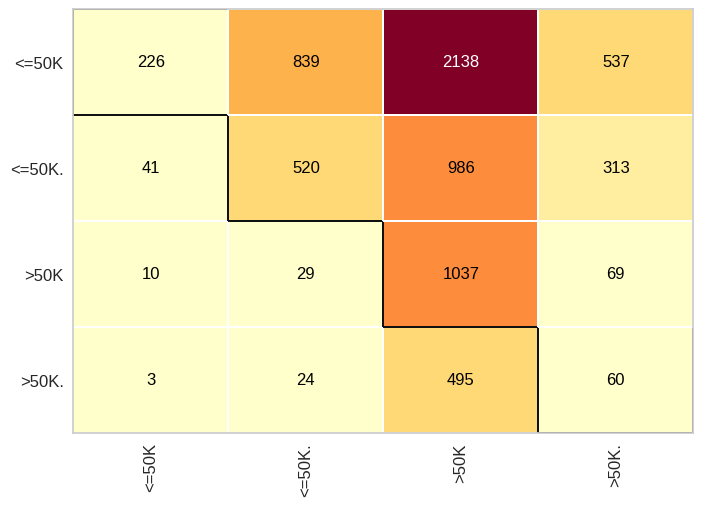

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, prev))

              precision    recall  f1-score   support

       <=50K       0.81      0.06      0.11      3740
      <=50K.       0.37      0.28      0.32      1860
        >50K       0.22      0.91      0.36      1145
       >50K.       0.06      0.10      0.08       582

    accuracy                           0.25      7327
   macro avg       0.36      0.34      0.22      7327
weighted avg       0.55      0.25      0.20      7327



# Árvores de decisão

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
prev = arvore_census.predict(x_census_teste)
prev

array(['<=50K', '<=50K.', '<=50K.', ..., '>50K', '<=50K.', '<=50K.'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, prev)

0.47454619899003686

0.47454619899003686

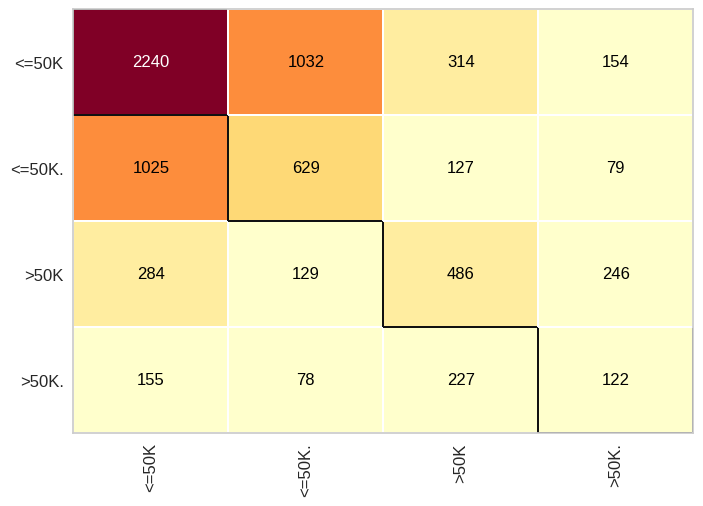

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, prev))

              precision    recall  f1-score   support

       <=50K       0.60      0.60      0.60      3740
      <=50K.       0.34      0.34      0.34      1860
        >50K       0.42      0.42      0.42      1145
       >50K.       0.20      0.21      0.21       582

    accuracy                           0.47      7327
   macro avg       0.39      0.39      0.39      7327
weighted avg       0.48      0.47      0.48      7327



# Random Forest

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
prev = random_forest_census.predict(x_census_teste)
prev

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, prev)

0.8507676560900717

0.8507676560900717

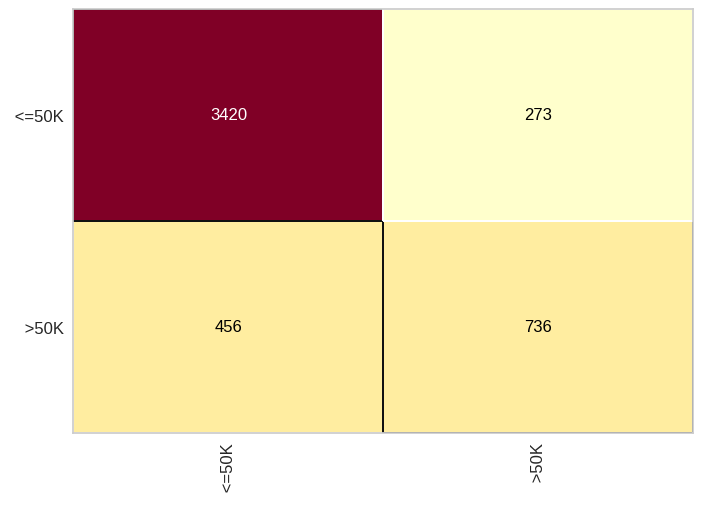

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, prev))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# kNN

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
prev = knn_census.predict(x_census_teste)
prev

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, prev)

0.8290685772773797

0.8290685772773797

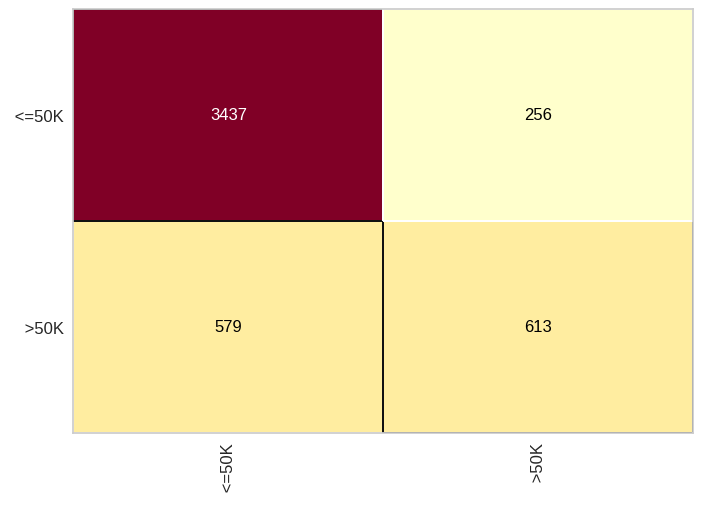

In [ ]:
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, prev))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



# Regressão Logística

In [ ]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(x_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [ ]:
prev = logistic_census.predict(x_census_teste)
prev

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

0.849539406345957

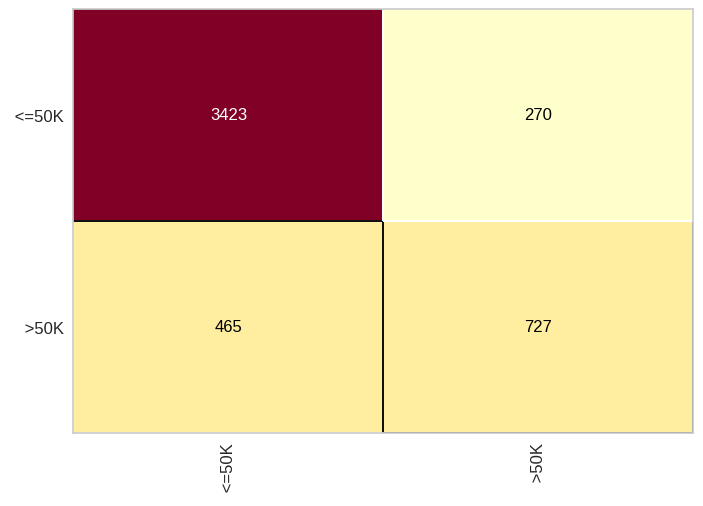

In [ ]:
cm = ConfusionMatrix(logistic_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, prev))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# SVM

In [ ]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
svm_census = SVC(kernel='linear', random_state=1)
svm_census.fit(x_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [ ]:
prev = svm_census.predict(x_census_teste)
prev

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, prev)

0.8507676560900717

0.8507676560900717

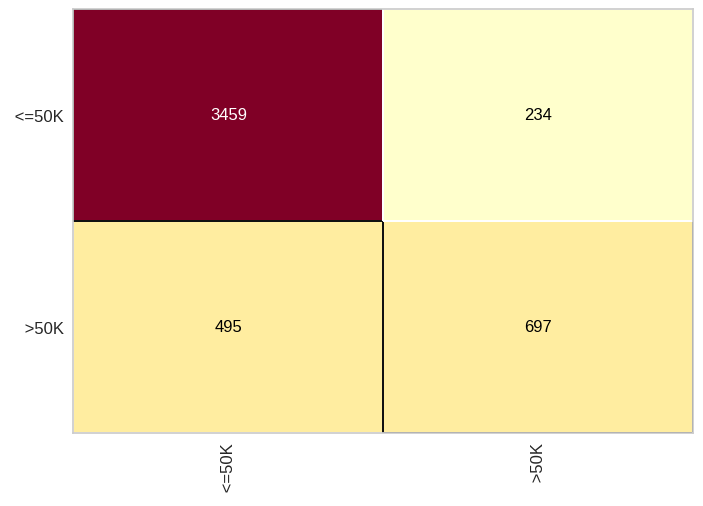

In [ ]:
cm = ConfusionMatrix(svm_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, prev))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

